In [1]:
import tensorflow as tf

import pandas as pd

import numpy as np



In [2]:
my_data = pd.read_csv('train.csv')

## Selecting the required columns

In [9]:
my_data_use = my_data.iloc[:,2:]

In [10]:
my_data_use

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative
...,...,...
27476,d lost,negative
27477,", don`t force",negative
27478,Yay good for both of you.,positive
27479,But it was worth it ****.,positive


## Shuffling the data to make sure model doesn't train in a bias way

In [43]:
train_shuffled = my_data_use.sample(frac = 1, random_state = 42)

In [44]:
train_shuffled

,selected_text,sentiment
1588,t? lovelovelove,positive
23879,resting had a whole day of walking,neutral
6561,"was in Palawan a couple of days ago, i`ll try ...",neutral
2602,horrible.,negative
4003,glad,positive
...,...,...
21575,STAR TREK WAS PURE AWESOME! LOVE IT!!! <3333 ...,positive
5390,"Will be going to Indiana Baptist Sunday, Pray ...",neutral
860,is sitting thru the boring bits in Titanic wai...,neutral
15795,Missed the play,negative


In [24]:
train_shuffled

,selected_text,sentiment
1588,t? lovelovelove,positive
23879,resting had a whole day of walking,neutral
6561,"was in Palawan a couple of days ago, i`ll try ...",neutral
2602,horrible.,negative
4003,glad,positive
...,...,...
21575,STAR TREK WAS PURE AWESOME! LOVE IT!!! <3333 ...,positive
5390,"Will be going to Indiana Baptist Sunday, Pray ...",neutral
860,is sitting thru the boring bits in Titanic wai...,neutral
15795,Missed the play,negative


## Using label encoder to convert the output categorical values to numerical values 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_shuffled['sentiment'] = label_encoder.fit_transform(train_shuffled['sentiment'].to_numpy())
#val_labels_encoded = label_encoder.transform(valid_labels.to_numpy())

## Removing the stop words -- Example by using nltk library

In [20]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
len(sw_nltk)

179

In [22]:
text = "When I first met her she was very quiet. She remained quiet during the entire two hour long journey from Stony Brook to New York."
words = [word for word in text.split() if word.lower() not in sw_nltk]
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

first met quiet. remained quiet entire two hour long journey Stony Brook New York.
Old length:  129
New length:  82


## Applying NLTK- stopwords on our data

### Removing the numbers since without removing number we can't remove stop words 

In [51]:
for i, n in enumerate( train_shuffled['selected_text']):
    train_shuffled['selected_text'][i] = ''.join([i for i in n if not i.isdigit()])

In [81]:
train_shuffled['selected_text'].apply(lambda x: [item for item in x if item not in sw_nltk])

1588      [_, n,  , w, e, l, l,  ,  , e,  , c, u, l, n, `]
23879    [n,  , c, p, u, e, r,  , c, l, ,,  , p, h,  , ...
6561                                             [n, c, e]
2602                  [c, n,  , w,  ,  , h, v, e,  , f, .]
4003                                 [r, e, l, l,  , n, k]
                               ...                        
21575    [h, h, h, h, h, !, !,  ,  , w, u, l,  , b, e, ...
5390                                             [u, c, k]
860                               [h, n, k,  , c, l, r, ,]
15795    [T, r, f, f, c,  , b, c, k, e,  , u, p,  , n, ...
23654              [T, h, n, k,  , r, l, n, g,  , g, r, l]
Name: selected_text, Length: 27481, dtype: object

## Splitting the data into train and test 

In [105]:
from sklearn.model_selection import train_test_split

train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_shuffled['selected_text'].to_numpy(),
                                                                              train_shuffled['sentiment'].to_numpy(),
                                                                              test_size = 0.1, # 10 percent training
                                                                              random_state = 42) 


In [87]:
len(val_sentences) , len(val_labels)

(2749, 2749)

# Tokenizing - Converting the text into numbers

In [90]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Set up tex vectorization varaibles

max_vocab_length = 10000

max_length = 15 # how many words can a tweet see


text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                  standardize='lower_and_strip_punctuation',
                                   output_mode = 'int',
                                   output_sequence_length = max_length)





In [97]:
from tensorflow.keras import layers

text_vectorizer.adapt(train_sentences)

### Creating the embedding layer 

In [98]:
embedding = layers.Embedding(input_dim = max_vocab_length,
                            output_dim = 128, # It should be multiple of 8 can be more (more value for less powerd) as per GPU computation power
                            input_length = max_length) # Length the value should be)

### A metrics function is created to evaluate the machine learning model later 

In [99]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score
def metrics(y_true, y_pred):
    Accuracy = accuracy_score(y_true, y_pred)
    Precision = precision_score(y_true, y_pred)
    Recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    
    return {f'Accuracy :{float(Accuracy*100)}',f'Precision:{Precision}',f'Recall: {Recall}',f'f1score: {f1score}'}

## Model - 1 With LSTM

In [140]:
from tensorflow.keras import layers

inputs = layers.Input(shape= (1,), dtype = 'string')

x = text_vectorizer(inputs)

x = embedding(x)

#x = layers.LSTM(64, return_sequences = True)(x)


x = layers.LSTM(64)(x)

x = layers.Dense(64, activation = 'relu') (x)


outputs = layers.Dense(3, activation = 'softmax') (x)

model_1 = tf.keras.Model(inputs , outputs , name = 'model_1_lstm')

In [141]:
model_1.summary()

Model: "model_1_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                      

In [142]:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,),
             metrics = ['Accuracy'])

In [143]:
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                             epochs = 10,
                             validation_data = (val_sentences, val_labels)
                             )
                             

Epoch 1/10
773/773 [==============================] - 5s 6ms/step - loss: 1.0321 - Accuracy: 0.4534 - val_loss: 1.1662 - val_Accuracy: 0.3579
Epoch 2/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9723 - Accuracy: 0.4895 - val_loss: 1.2703 - val_Accuracy: 0.3660
Epoch 3/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9339 - Accuracy: 0.5031 - val_loss: 1.2776 - val_Accuracy: 0.3907
Epoch 4/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9162 - Accuracy: 0.5094 - val_loss: 1.3737 - val_Accuracy: 0.3747
Epoch 5/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9086 - Accuracy: 0.5143 - val_loss: 1.3806 - val_Accuracy: 0.3619
Epoch 6/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9039 - Accuracy: 0.5092 - val_loss: 1.3772 - val_Accuracy: 0.3721
Epoch 7/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9006 - Accuracy: 0.5155 - val_loss: 1.3919 - val_Accuracy: 0.3794
Epoch 

In [144]:
model_1.evaluate(val_sentences, val_labels)

86/86 [==============================] - 0s 6ms/step - loss: 1.4754 - Accuracy: 0.3663


[1.4753963947296143, 0.3663150370121002]

# Model - 2 With GRU

In [149]:
inputs = layers.Input(shape= (1,), dtype = 'string')

x = text_vectorizer(inputs)

x = embedding(x)

#x = layers.LSTM(64, return_sequences = True)(x)


x = layers.GRU(64)(x)

x = layers.Dense(64, activation = 'relu') (x)

x = layers.Dropout(0.2) (x)

x = layers.Dense(64, activation = 'relu') (x)

outputs = layers.Dense(3, activation = 'softmax') (x)

model_2 = tf.keras.Model(inputs , outputs , name = 'model_1_lstm')

In [150]:
model_2.summary()

Model: "model_1_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [151]:
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,),
             metrics = ['Accuracy'])

model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                             epochs = 10,
                             validation_data = (val_sentences, val_labels)
                             )
                             

Epoch 1/10
773/773 [==============================] - 6s 6ms/step - loss: 0.9947 - Accuracy: 0.4746 - val_loss: 1.2882 - val_Accuracy: 0.3667
Epoch 2/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9453 - Accuracy: 0.4966 - val_loss: 1.3266 - val_Accuracy: 0.3714
Epoch 3/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9304 - Accuracy: 0.4998 - val_loss: 1.4135 - val_Accuracy: 0.3721
Epoch 4/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9194 - Accuracy: 0.4999 - val_loss: 1.5325 - val_Accuracy: 0.3736
Epoch 5/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9107 - Accuracy: 0.5018 - val_loss: 1.4595 - val_Accuracy: 0.3900
Epoch 6/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9066 - Accuracy: 0.5080 - val_loss: 1.5514 - val_Accuracy: 0.3823
Epoch 7/10
773/773 [==============================] - 4s 5ms/step - loss: 0.9042 - Accuracy: 0.5073 - val_loss: 1.4820 - val_Accuracy: 0.3780
Epoch 

In [152]:
model_2.evaluate(val_sentences, val_labels)

86/86 [==============================] - 0s 4ms/step - loss: 1.4510 - Accuracy: 0.3790


[1.4510115385055542, 0.3790469169616699]

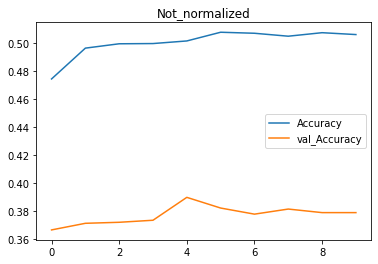

In [154]:
a = pd.DataFrame(model_2_history.history)
c = a.loc[:,['Accuracy','val_Accuracy']].plot(title = 'Not_normalized')

# Model - 3 _ Conv1D

In [155]:
inputs = layers.Input(shape = (1,), dtype = tf.string)

x = text_vectorizer(inputs)

x = embedding(x)

#x = layers.Dense(100, activation = 'relu')

x = layers.Conv1D(32,3, activation = 'relu') (x)

x = layers.GlobalAveragePooling1D()(x)


x = layers.Dense(100, activation = 'relu')(x)

x = layers.Dense(100, activation = 'relu')(x)


outputs = layers.Dense(3 , activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs, outputs , name = 'model_3')

In [156]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 13, 32)            12320     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_25 (Dense)            (None, 100)               3300

In [157]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,),
             metrics = ['Accuracy'])

model_3_history = model_3.fit(x = train_sentences,
                              y = train_labels,
                             epochs = 10,
                             validation_data = (val_sentences, val_labels)
                             )
                             

Epoch 1/10
773/773 [==============================] - 7s 4ms/step - loss: 0.9843 - Accuracy: 0.4761 - val_loss: 1.3385 - val_Accuracy: 0.3918
Epoch 2/10
773/773 [==============================] - 3s 4ms/step - loss: 0.9142 - Accuracy: 0.5038 - val_loss: 1.4118 - val_Accuracy: 0.3820
Epoch 3/10
773/773 [==============================] - 3s 4ms/step - loss: 0.8839 - Accuracy: 0.5123 - val_loss: 1.6014 - val_Accuracy: 0.3616
Epoch 4/10
773/773 [==============================] - 3s 4ms/step - loss: 0.8612 - Accuracy: 0.5163 - val_loss: 1.9994 - val_Accuracy: 0.3718
Epoch 5/10
773/773 [==============================] - 4s 5ms/step - loss: 0.8523 - Accuracy: 0.5208 - val_loss: 1.7941 - val_Accuracy: 0.3656
Epoch 6/10
773/773 [==============================] - 3s 4ms/step - loss: 0.8361 - Accuracy: 0.5217 - val_loss: 2.1331 - val_Accuracy: 0.3860
Epoch 7/10
773/773 [==============================] - 3s 5ms/step - loss: 0.8314 - Accuracy: 0.5263 - val_loss: 2.1052 - val_Accuracy: 0.3841
Epoch 

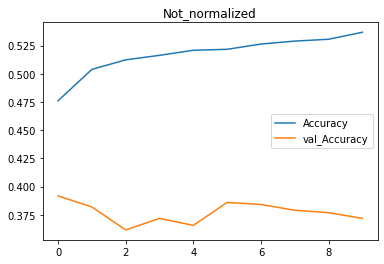

In [158]:
a = pd.DataFrame(model_3_history.history)
c = a.loc[:,['Accuracy','val_Accuracy']].plot(title = 'Not_normalized')

# Using the universal encoder

In [160]:
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                       input_shape = [],
                                       dtype = tf.string,
                                        trainable = False,
                                        name ='USE')

In [161]:
inputs = layers.Input(shape = (), dtype = tf.string, name = 'input_layer')

x = sentence_encoder_layer(inputs)

x = layers.Dense(64, activation = 'relu') (x)

x = layers.Dropout(0.1)(x)

x = layers.Dense(64, activation = 'relu') (x)

outputs = layers.Dense(3 , activation = 'softmax')(x)


model_4 = tf.keras.Model(inputs, outputs , name = 'model_4')

In [162]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_28 (Dense)            (None, 64)                32832     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 3)                 195       
                                                                 
Total params: 256,835,011
Trainable params: 37,187
Non-trai

In [163]:
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,),
             metrics = ['Accuracy'])

model_4_history = model_4.fit(x = train_sentences,
                              y = train_labels,
                             epochs = 10,
                             validation_data = (val_sentences, val_labels)
                             )
                             

Epoch 1/10
773/773 [==============================] - 12s 13ms/step - loss: 1.0893 - Accuracy: 0.4032 - val_loss: 1.0847 - val_Accuracy: 0.4096
Epoch 2/10
773/773 [==============================] - 10s 13ms/step - loss: 1.0888 - Accuracy: 0.4034 - val_loss: 1.0852 - val_Accuracy: 0.4096
Epoch 3/10
773/773 [==============================] - 10s 12ms/step - loss: 1.0882 - Accuracy: 0.4033 - val_loss: 1.0849 - val_Accuracy: 0.4100
Epoch 4/10
773/773 [==============================] - 10s 12ms/step - loss: 1.0876 - Accuracy: 0.4045 - val_loss: 1.0851 - val_Accuracy: 0.4096
Epoch 5/10
773/773 [==============================] - 10s 12ms/step - loss: 1.0871 - Accuracy: 0.4037 - val_loss: 1.0843 - val_Accuracy: 0.4096
Epoch 6/10
773/773 [==============================] - 10s 12ms/step - loss: 1.0863 - Accuracy: 0.4038 - val_loss: 1.0861 - val_Accuracy: 0.4096
Epoch 7/10
773/773 [==============================] - 10s 12ms/step - loss: 1.0852 - Accuracy: 0.4043 - val_loss: 1.0882 - val_Accuracy:

In [164]:
len(val_sentences)

2749

In [165]:
len(val_labels)

2749